# SET A

In [ ]:
# 1. Write a python program to implement the k-means algorithm on a synthetic dataset.
#(Use make_blobs module from sklearn.datasets)

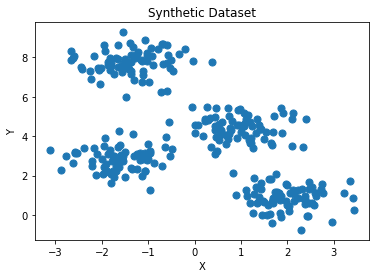

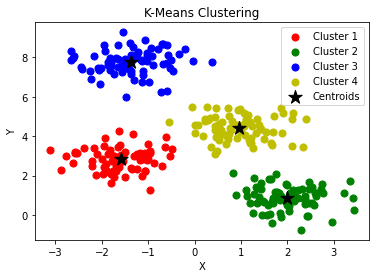

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Dataset')
plt.show()

# Apply k-means algorithm
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters and centroids
colors = ['r', 'g', 'b', 'y']
for i in range(len(centroids)):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], s=50, label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [ ]:
#2. Write a python program to implement Agglomerative clustering on a
# synthetic dataset. (Use make_blobs module from sklearn.datasets)

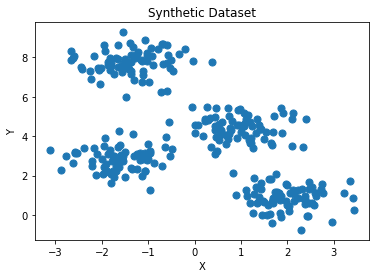

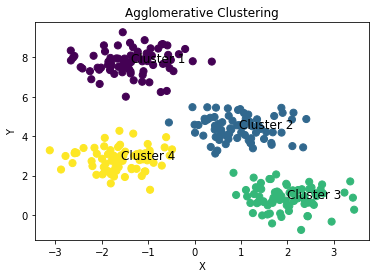

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Dataset')
plt.show()

# Apply Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
labels = agg_clustering.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Agglomerative Clustering')
for i in range(len(np.unique(labels))):
    plt.text(X[labels == i, 0].mean(), X[labels == i, 1].mean(), f'Cluster {i+1}', fontsize=12)
plt.show()


# Set B (Practice Assignment)

In [ ]:
#Consider the given dataset in the Mall_Customers.csv file:
#a) Find the optimal number of clusters using the Elbow method. (Plot the
#graph as Number of clusters versus WCSS)
#b) Apply k-means on the given data with optimal value of k (found in (a)).

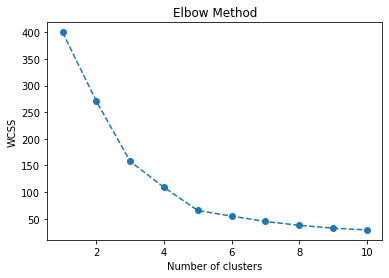

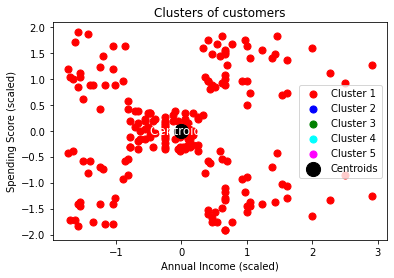

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Extract relevant features
X = data.iloc[:, [3, 4]].values  # Using Annual Income and Spending Score for clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Based on the Elbow method, let's choose the optimal number of clusters
optimal_k = np.argmin(np.diff(wcss)) + 1

# Apply k-means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()

# Label the clusters
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='center', va='center', color='white')

plt.show()


In [ ]:
#2. Consider the given dataset in the penguins.CSV file:
#a) Form clusters using Agglomerative clustering to plot dendrogram.
#Identify the correct number of clusters from dendrogram.
#b) Show all clusters in different colors using a scatter plot.

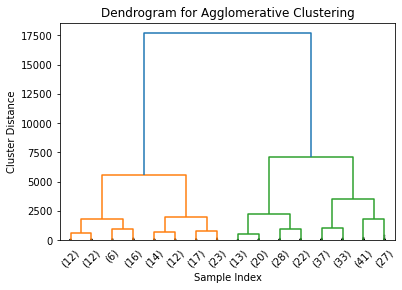

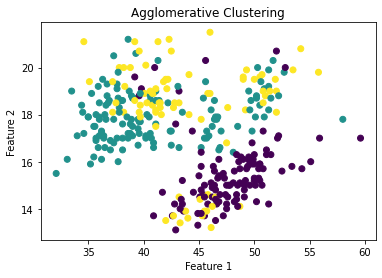

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv("penguins.csv")

# Drop rows with missing values
data = data.dropna()

# Extract relevant features
numeric_features = data.select_dtypes(include=[np.number]).values
categorical_features = data.select_dtypes(exclude=[np.number])

# Encode categorical features into numerical values
label_encoder = LabelEncoder()
encoded_categorical_features = categorical_features.apply(label_encoder.fit_transform).values

# Combine numeric and encoded categorical features
features = np.hstack((numeric_features, encoded_categorical_features))

# Hierarchical Agglomerative Clustering
linkage_matrix = linkage(features, 'ward')

# Plotting the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()

# Apply Agglomerative Clustering with a chosen number of clusters
optimal_clusters = 3  # Adjust this based on your observation from the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
labels = agg_clustering.fit_predict(features)

# Show all clusters in different colors using a scatter plot
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering")
plt.show()

